In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Data Ceaning and Preprocessing (EDA)

In [2]:
df = pd.read_csv("C:\\Users\\Ghanshyam Patil\\Downloads\\diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53156 non-null  float64
 6   table       53916 non-null  float64
 7   price       53483 non-null  float64
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
df.shape

(53940, 11)

In [6]:
# Handling Missing Values
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         784
table          24
price         457
x               0
y               0
z               0
dtype: int64

In [7]:
df['cut'].value_counts()

cut
Ideal        21547
Premium      13801
Very Good    12079
Good          4906
Fair          1607
Name: count, dtype: int64

In [8]:
## Observation - In Depth , table , Price has missing value

In [9]:
df.interpolate(method ='linear', limit_direction ='forward',inplace=True) 

In [10]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [11]:
# Remove Unwanted Cols

df = df.drop(['Unnamed: 0'],axis=1)

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [13]:
# Looking out the statistical analysis of Dataset
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.744171,57.456980,3933.518567,5.731157,5.734526,3.538734
std,0.474011,1.429113,2.234443,3988.942621,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,952.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [24]:
df.to_csv('Check.csv')

In [25]:
# Handling Outliers

 Min value of x,y,z are zero this indicates there are any faulty value in data that represetns outlier .So we need to Filter out

<Axes: ylabel='x'>

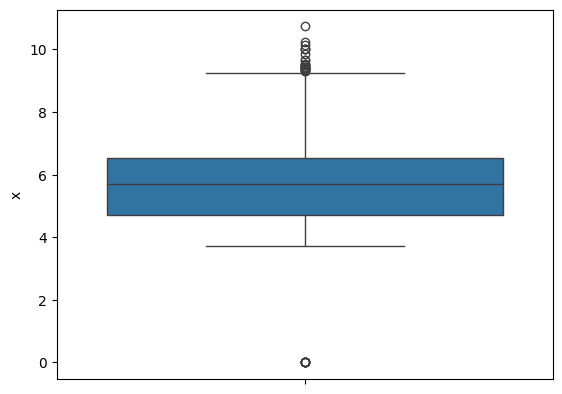

In [14]:
sns.boxplot(df['x'])

<Axes: ylabel='y'>

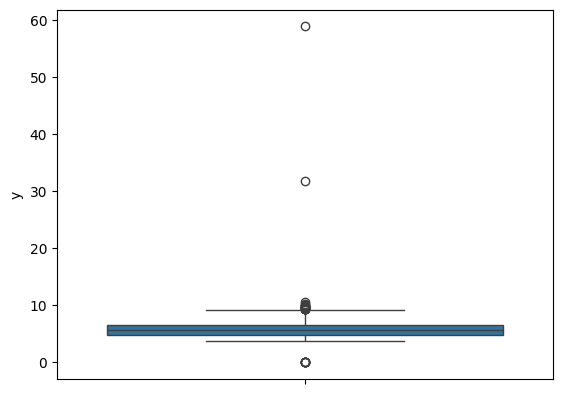

In [15]:
sns.boxplot(df['y'])

<Axes: ylabel='z'>

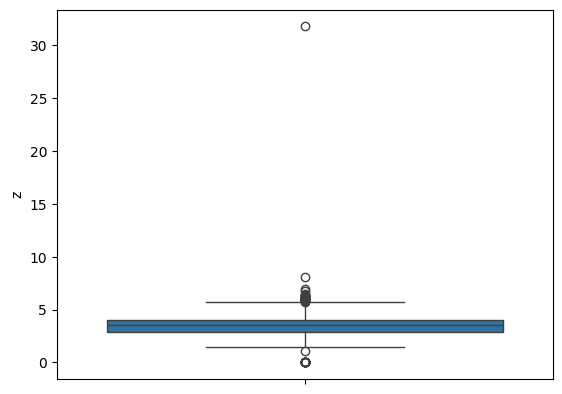

In [16]:
sns.boxplot(df['z'])

In [17]:
# Dropping the faulty values
df = df.drop(df[df['x'] == 0].index)
df = df.drop(df[df['y'] == 0].index)

df = df.drop(df[df['z'] == 0].index)

In [18]:
df.shape

(53920, 10)

Pairplot of data 

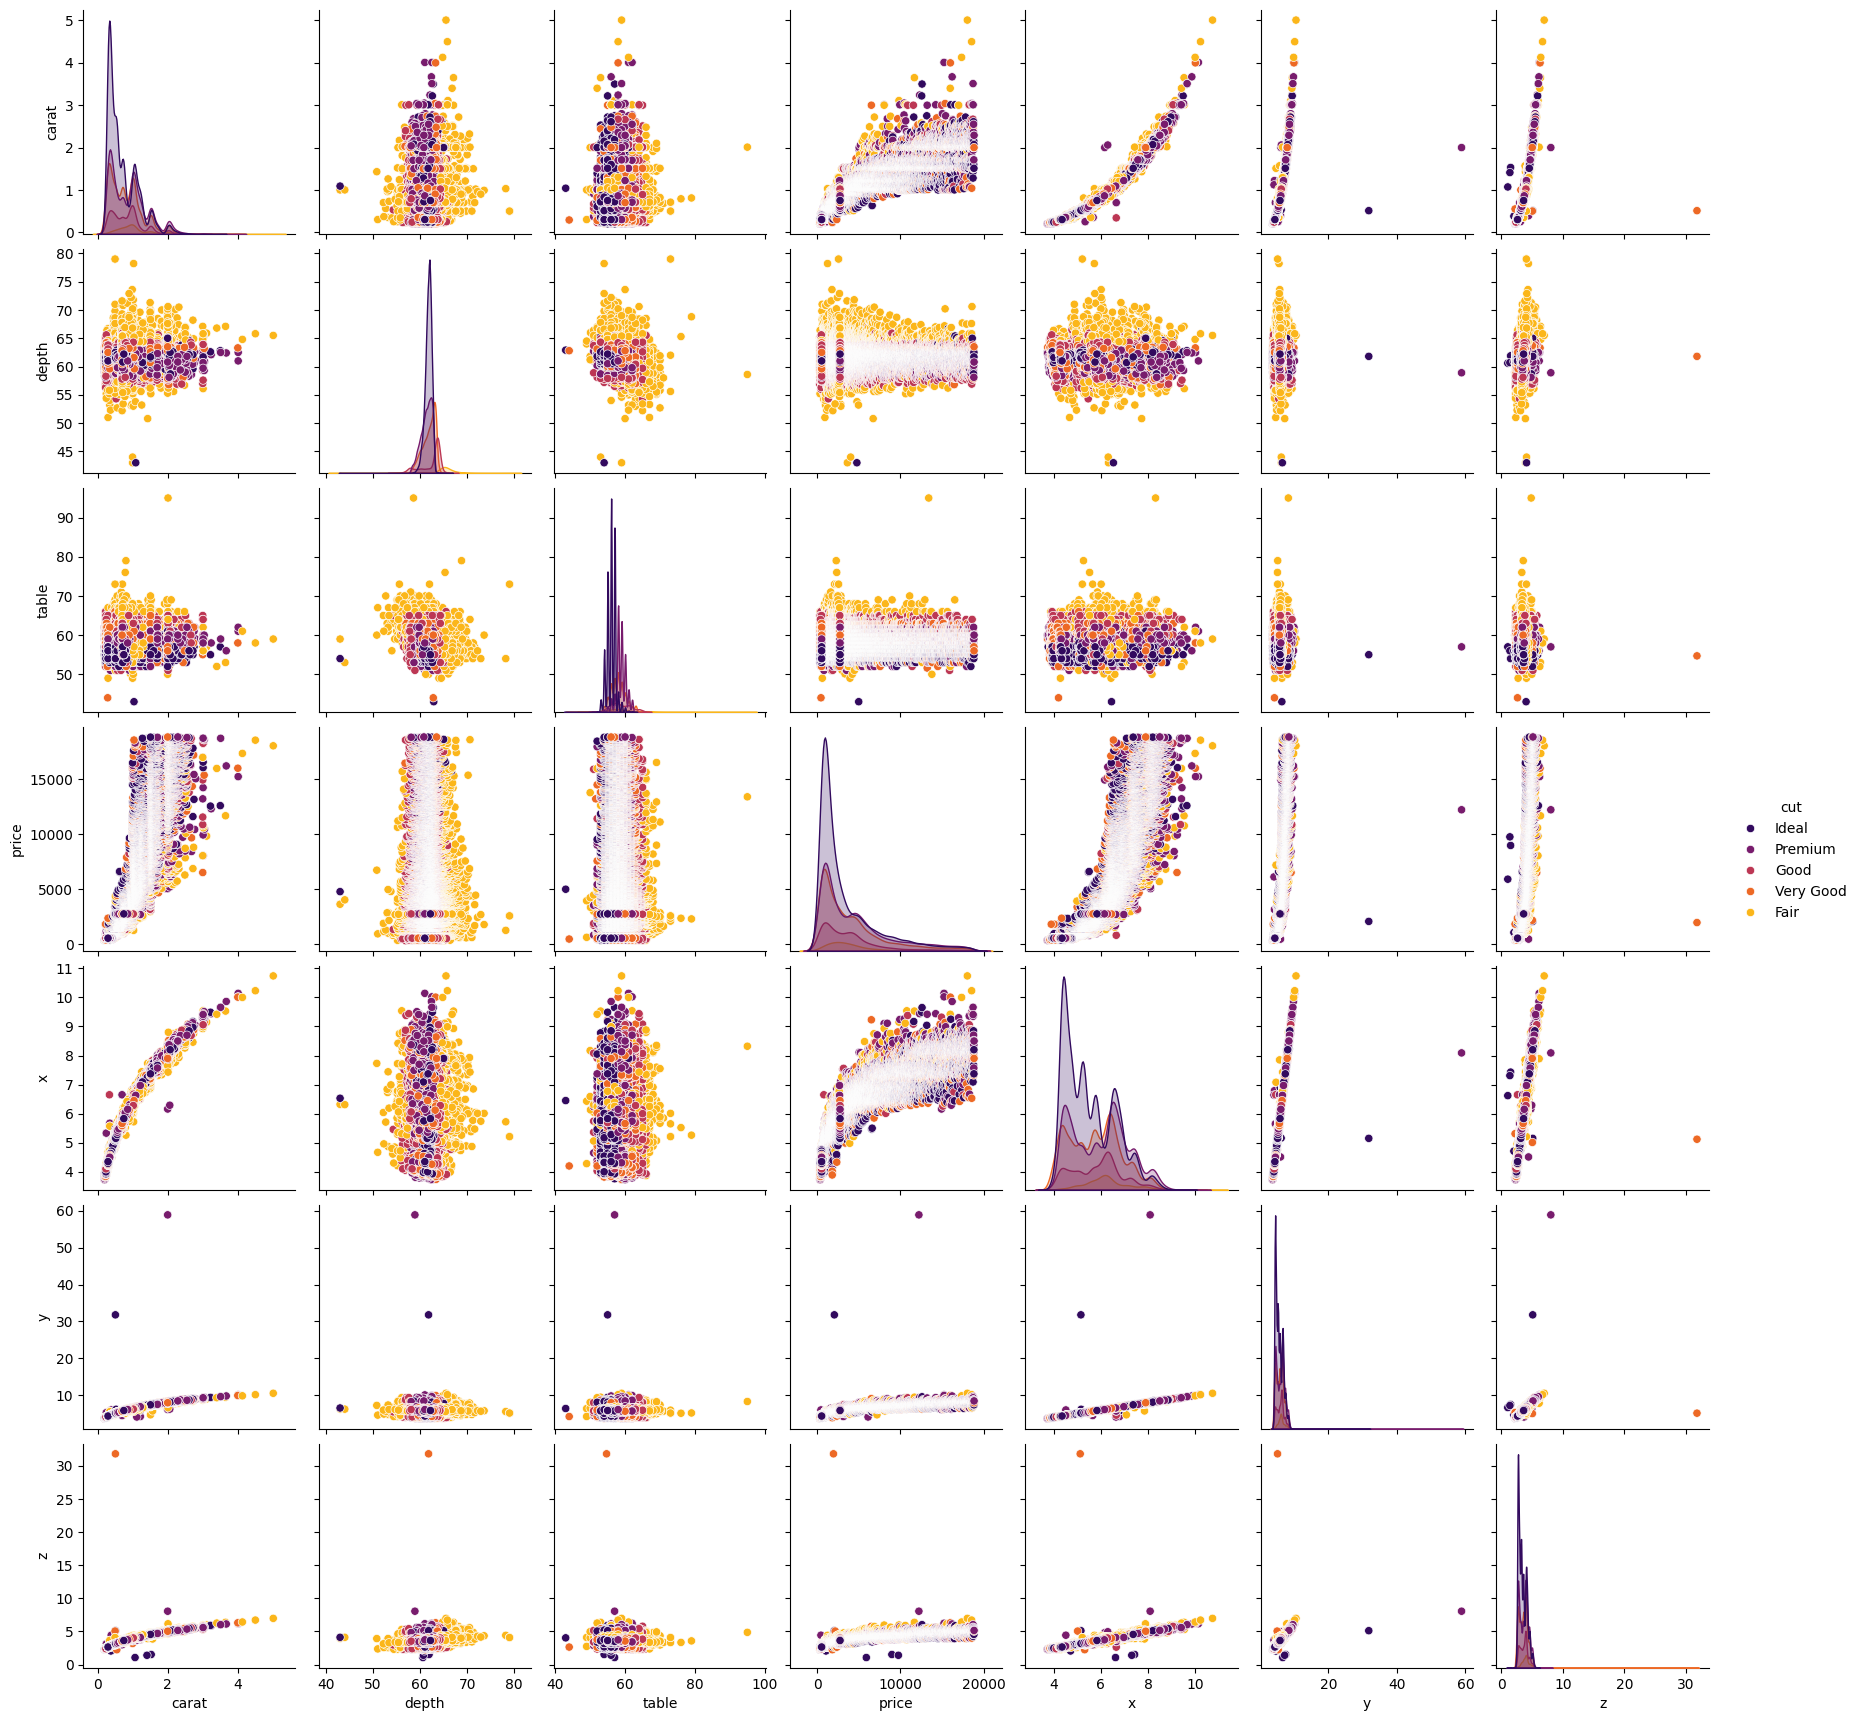

In [35]:
if 'cut' in df.columns:
    # Include 'cut' in the DataFrame slice for the pairplot
    df_subset = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut']]
    sns.pairplot(df_subset, hue='cut', palette='inferno')
else:
    print("The column 'cut' does not exist in the DataFrame.")

Text(0.5, 1.0, 'Regression Line on Price vs y ')

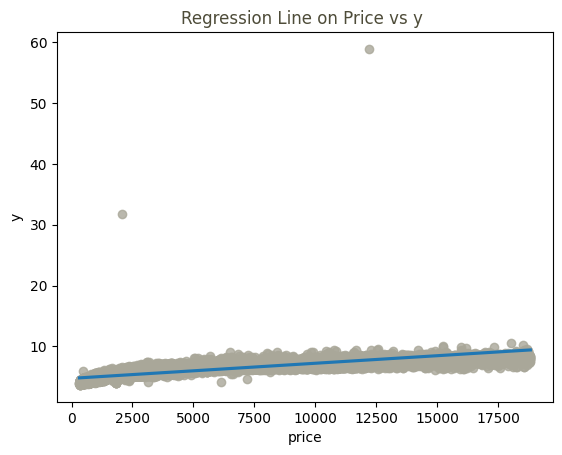

In [19]:
ax = sns.regplot(x='price',y='y',data=df,fit_reg=True,scatter_kws={'color':'#a9a799'})
ax.set_title('Regression Line on Price vs y ',color='#4e4c39')

Text(0.5, 1.0, 'Regression line on price vs z ')

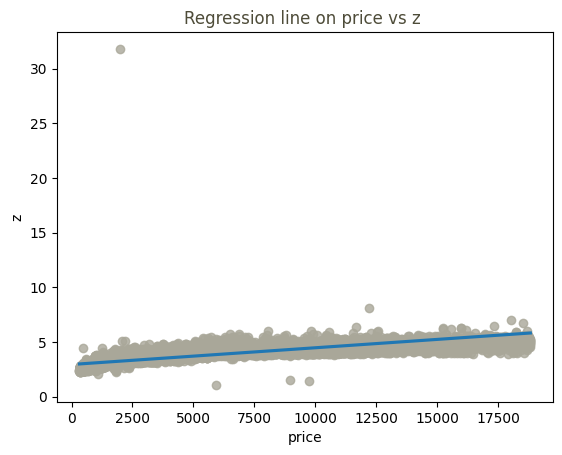

In [20]:
ax = sns.regplot(x='price',y='z',data=df,fit_reg=True,scatter_kws={'color':'#a9a799'})
ax.set_title('Regression line on price vs z ',color='#4e4c39')

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

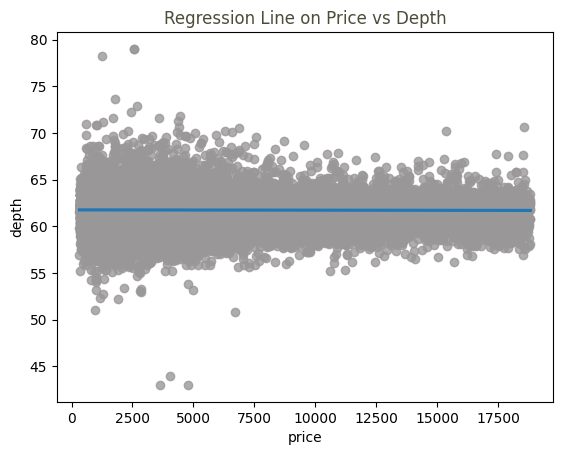

In [21]:
ax = sns.regplot(x='price',y='depth',data=df,fit_reg=True,scatter_kws={'color':'#9a9799'})
ax.set_title('Regression Line on Price vs Depth',color='#4e4c39')

Text(0.5, 1.0, 'Regression Line on Price vs Table')

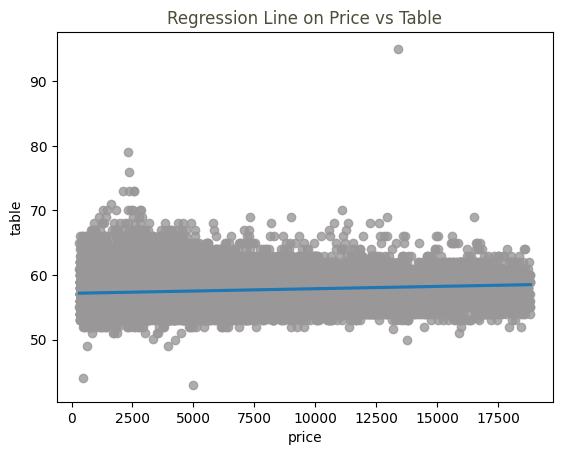

In [22]:
ax = sns.regplot(x='price',y='table',data=df,fit_reg=True,scatter_kws={'color':'#9a9799'})
ax.set_title('Regression Line on Price vs Table',color='#4e4c39')

In [23]:
# Dropping the outliers.
df = df[(df['depth']<75)&(df['depth']>45)]
df = df[(df['table']<80)&(df['table']>40)]
df = df[(df['x']<30)]
df = df[(df['y']<30)]
df = df[(df['z']<30)&(df['z']>2)]

In [24]:
df.shape

(53907, 10)

In [27]:
# We can clearly spot the outlier in these attribute next up we will remove these data pt 

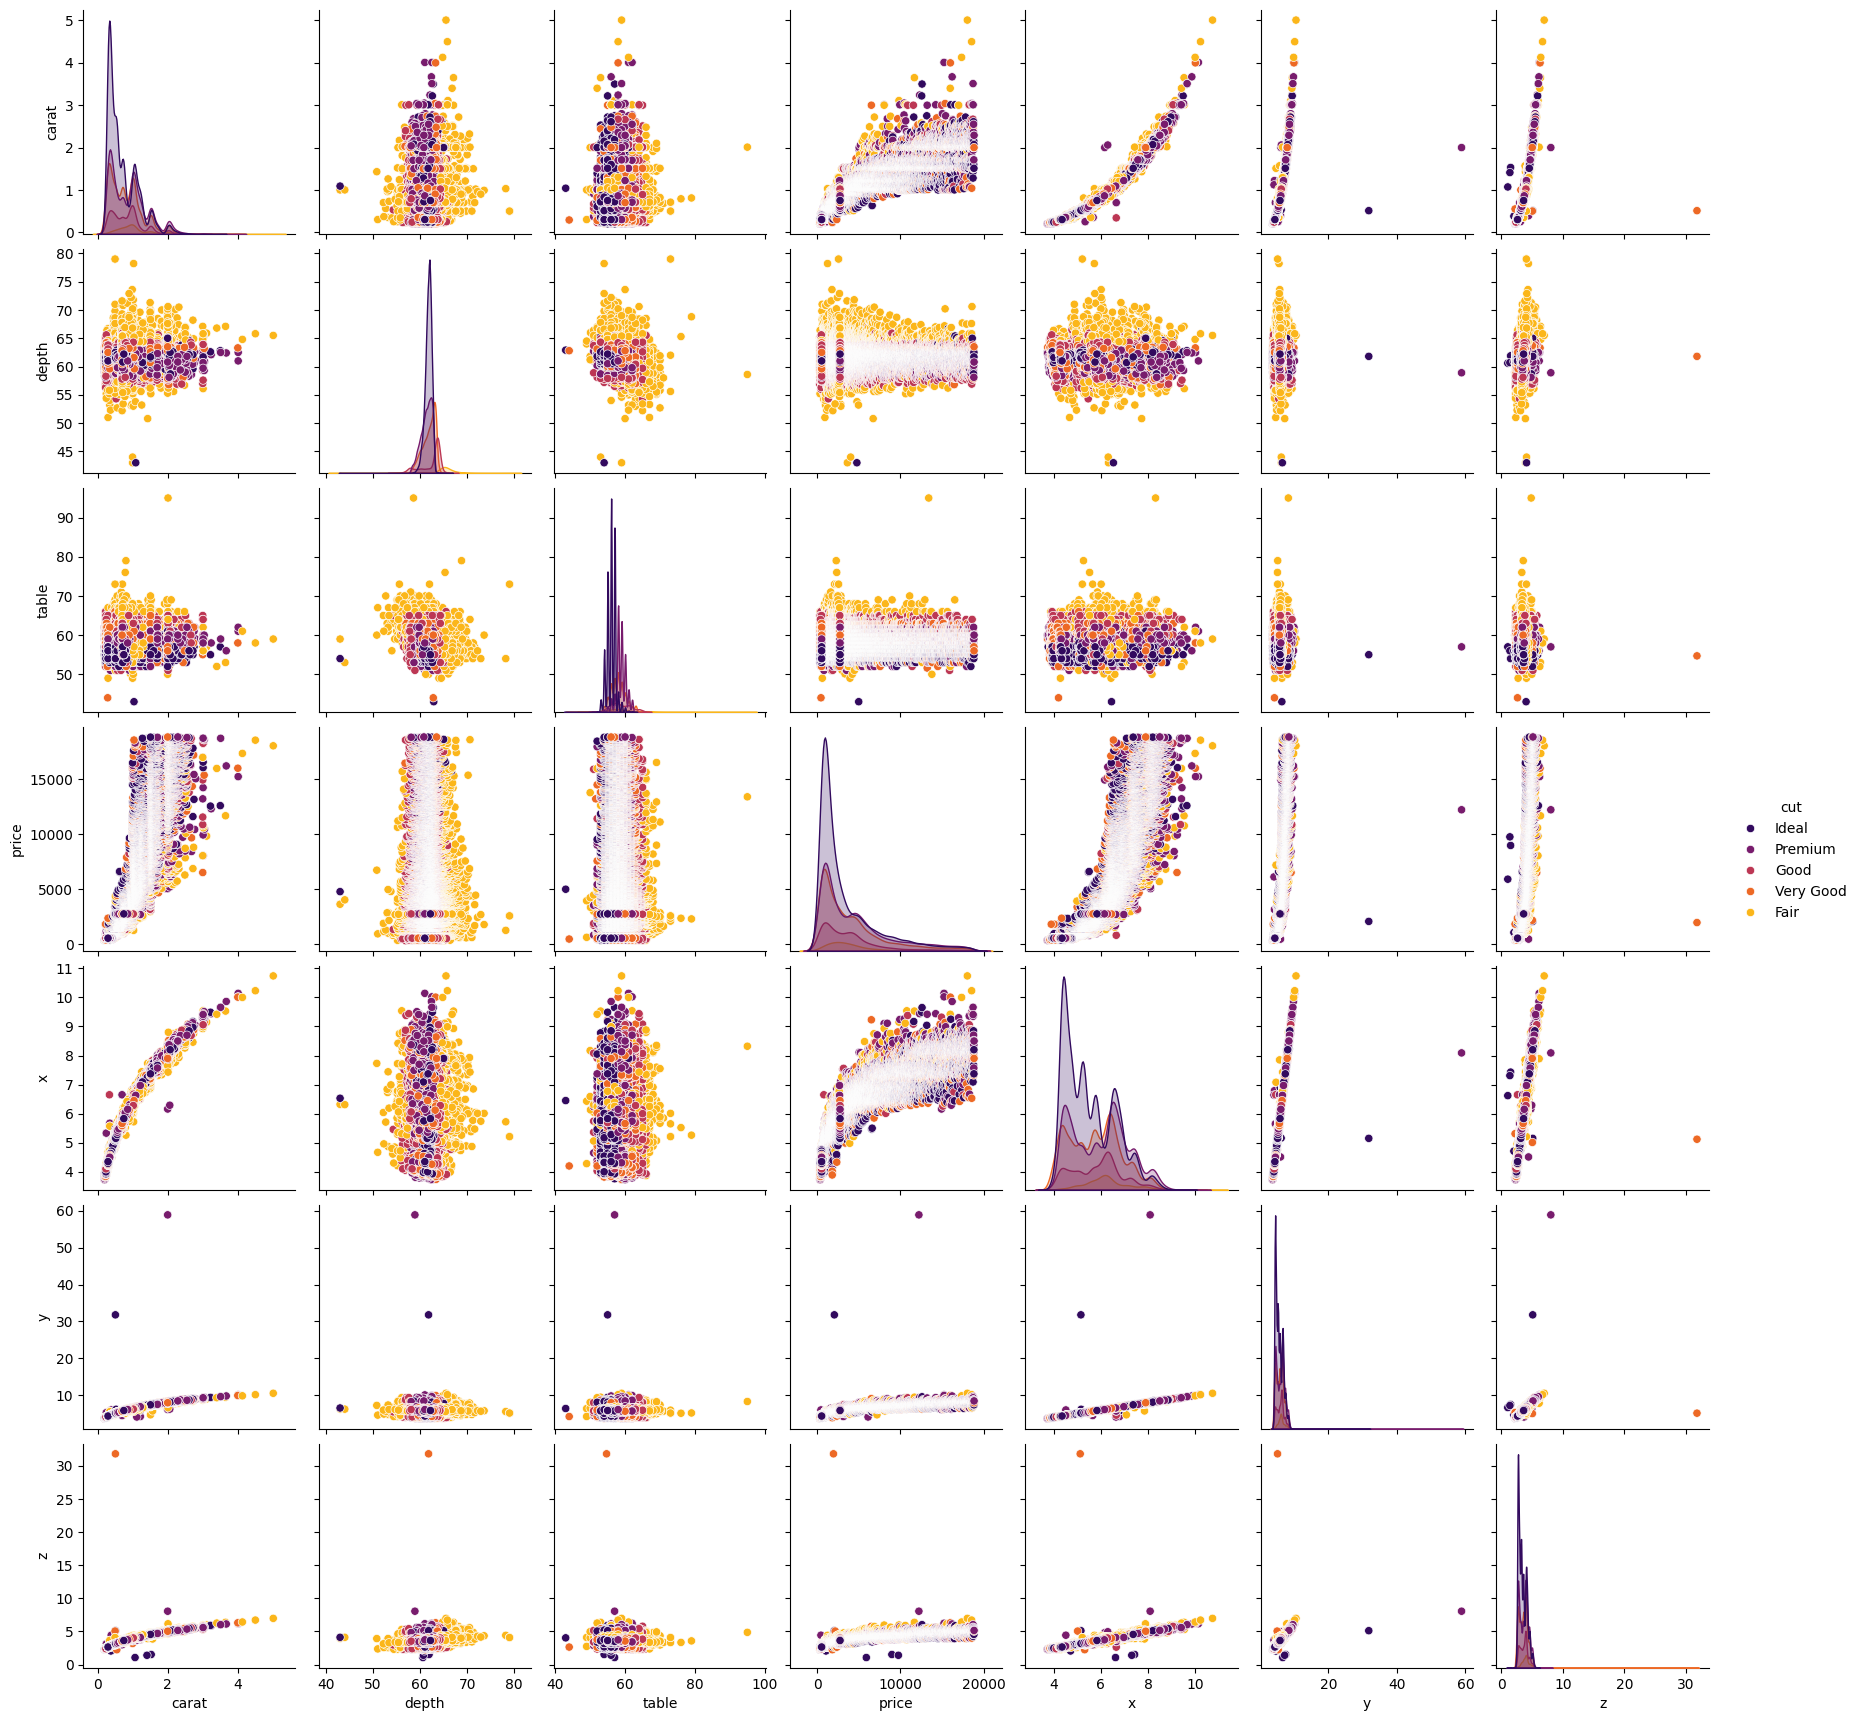

In [31]:
if 'cut' in df.columns:
    # Include 'cut' in the DataFrame slice for the pairplot
    df_subset = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut']]
    sns.pairplot(df_subset, hue='cut', palette='inferno')
else:
    print("The column 'cut' does not exist in the DataFrame.")

## Dealing with the Categorical variables

In [25]:
cat_var = [feature for feature in df.columns if df[feature].dtypes=='O']

In [26]:
cat_var

['cut', 'color', 'clarity']

In [27]:
# Observation - In Our Dataset there are only three Categorical col. 

Text(0.5, 0, 'cut')

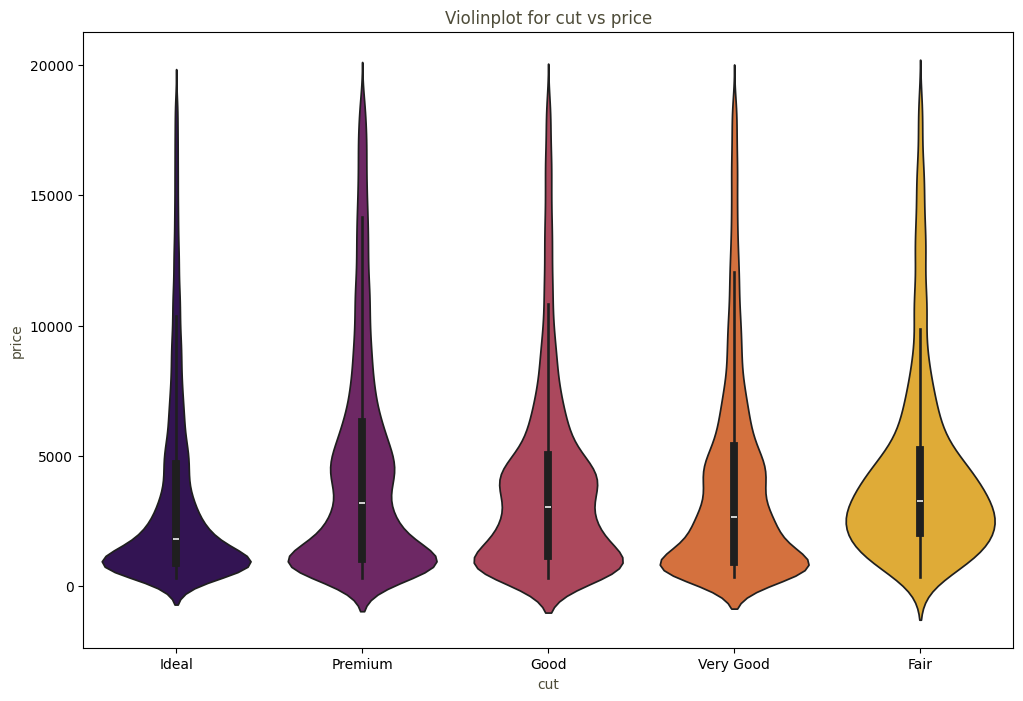

In [28]:
# Apply violin Plot
plt.figure(figsize=(12,8))
ax = sns.violinplot(x='cut',y='price',data=df,palette='inferno',scale='count')
ax.set_title('Violinplot for cut vs price',color='#4e4c39')
ax.set_ylabel('price',color='#4e4c39')
ax.set_xlabel('cut',color='#4e4c39')

Text(0.5, 0, 'color')

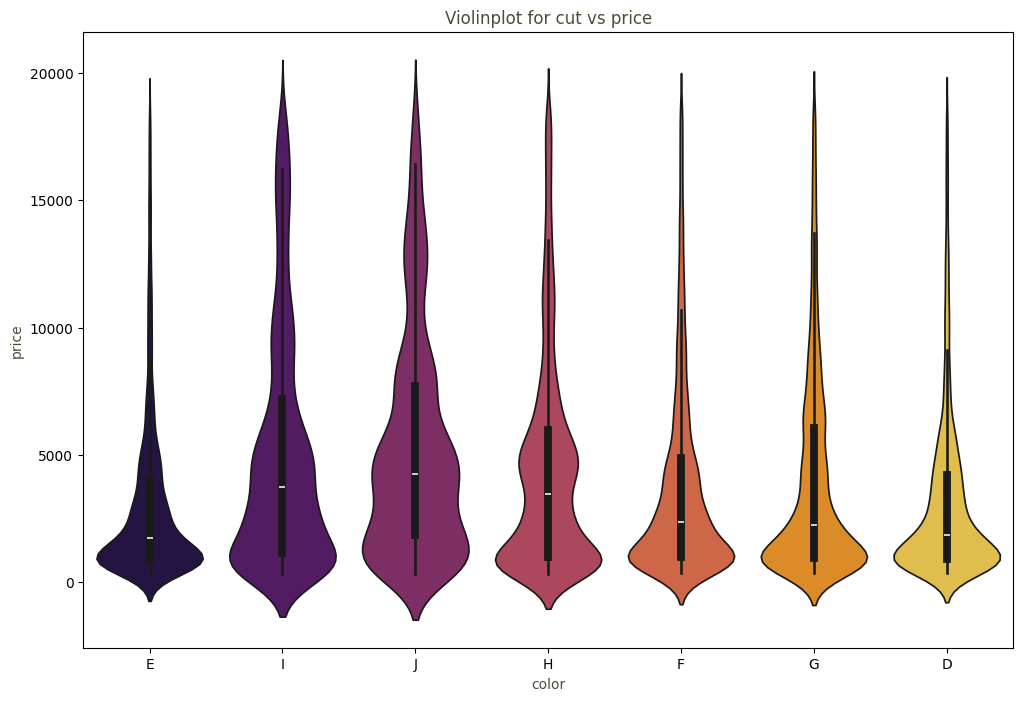

In [29]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x='color',y='price',data=df,palette='inferno',scale='count')
ax.set_title('Violinplot for cut vs price',color='#4e4c39')
ax.set_ylabel('price',color='#4e4c39')
ax.set_xlabel('color',color='#4e4c39')

Text(0.5, 0, 'clarity')

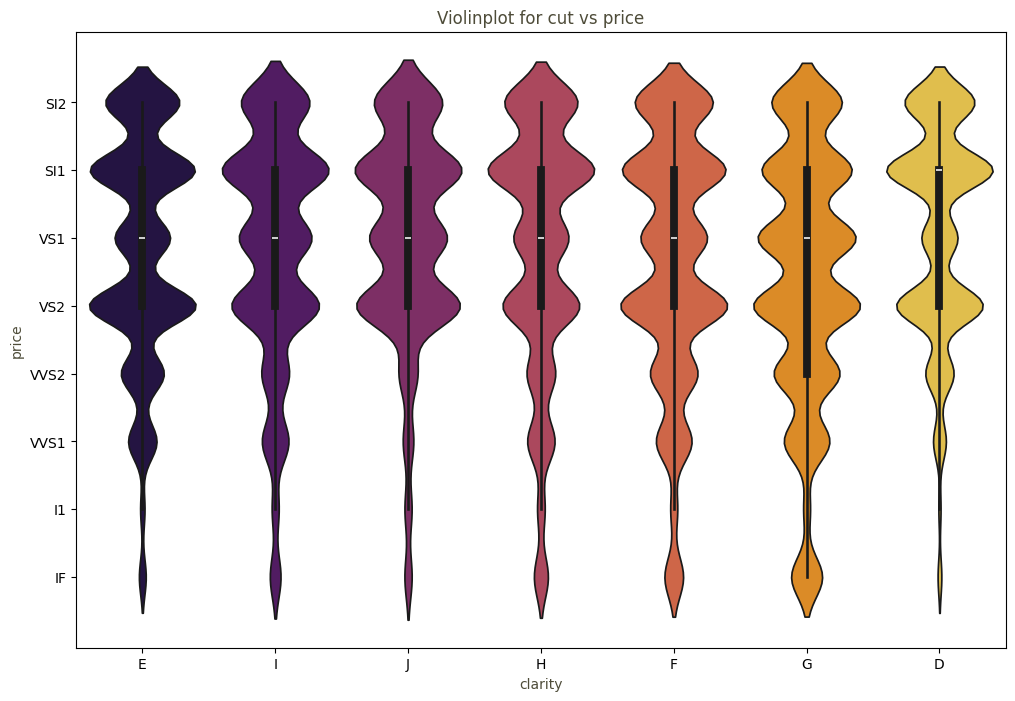

In [30]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x='color',y='clarity',data=df,palette='inferno',scale='count')
ax.set_title('Violinplot for cut vs price',color='#4e4c39')
ax.set_ylabel('price',color='#4e4c39')
ax.set_xlabel('clarity',color='#4e4c39')

In [31]:
# Label Encoding on Categorical Data

In [32]:
label_data = df.copy()

label_encod = LabelEncoder()

for col in cat_var:
    label_data[col] = label_encod.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75


In [33]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


<Axes: >

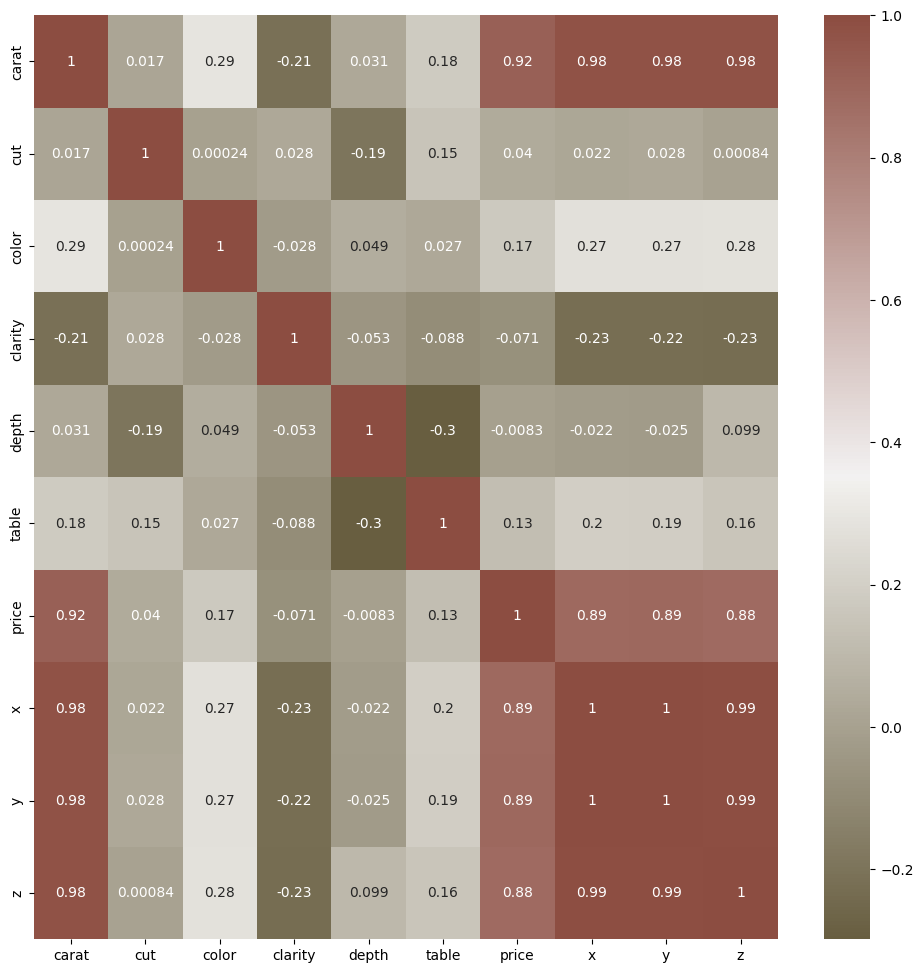

In [34]:
# Corelation Matrix
cmap = sns.diverging_palette(70,20,s=50,l=40,n=6,as_cmap=True)
corrmat = label_data.corr()
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True)

In [35]:
# Observation = x,y,z show high correlation to target col.
# Depth,cut,table show low corr

# Model Building

In [37]:
# Assigning the feature x and target y
x = label_data.drop(['price'],axis=1)
y = label_data['price']

In [38]:
# Training and Testing the data
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)

In [39]:
X_train.shape,X_test.shape

((40430, 9), (13477, 9))

In [44]:
# Building a pipeline for std scaler and model for various regressor
pipeline_lr = Pipeline([('scalar1',StandardScaler()),
                        ('lr_classifier',LinearRegression())])

pipeline_dt = Pipeline([('scalar2',StandardScaler()),
                       ('st_classifier',DecisionTreeRegressor())])

pipeline_rf = Pipeline([('scalar3',StandardScaler()),
                       ('rf_classifier',RandomForestRegressor())])

pipeline_kn = Pipeline([('scalar4',StandardScaler()),
                       ('kn_classifier',KNeighborsRegressor())])

pipeline_xgb = Pipeline([('scalar5',StandardScaler()),
                          ('xgb_classifier',XGBRegressor())])

In [46]:
# List of all pipeline
pipelines = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_kn,pipeline_xgb]

In [48]:
# Dict. of pipelines and model types for ease of refernce
pipe_dict = {0:'LinearRegressoin',1:'DecisionTree',2:'RandomForest',3:'KNeighbour',4:'xgbRegressor'}

In [49]:
# fit the pipeline
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [51]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegressoin: -1349.225066 
DecisionTree: -758.462399 
RandomForest: -548.626781 
KNeighbour: -824.347045 
xgbRegressor: -550.917233 


In [52]:
# Observation - In the above score. XGBCLassifier appears to be the model with the best scoring on negative mse
# let test this model on a test set eval. it with diff. paramete

In [53]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [56]:
print('R^2 :',metrics.r2_score(y_test,pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R^2 : 0.9803464874997663
Adjusted R^2: 0.9803333530516708
MAE: 280.1605428460998
MSE: 308217.82135892776
RMSE 555.1736857587252
